# Analytical Method Validation: Limit of Detection (LOD), Limit of Quantification (LOQ), and Precision Assessment

## Table of Contents
1. [Introduction](#introduction)  
2. [LOD and LOQ Control Chart](#lod-and-loq-control-chart)  
3. [Recovery Control Chart for Chlorogenic Acid](#recovery-control-chart-for-chlorogenic-acid)  
4. [Intra- and Inter-day Precision Analysis](#intra--and-inter-day-precision-analysis)  
5. [Comparative Measurement Analysis Under Light and Shade Conditions](#comparative-measurement-analysis-under-light-and-shade-conditions)


## Introduction

This notebook documents the validation of an analytical method for the quantification of a target compound, chlorogenic acid, in accordance with internationally recognized guidelines such as the Eucharem. The method validation addresses critical parameters including the Limit of Detection (LOD), Limit of Quantification (LOQ), recovery, and precision.

**Reference**:
Morillas PP, Terra AI, Uribe C, Mastromonaco G, Prieto JL, Torres M. Guía Eurachem: La Adecuación al uso de los Métodos Analíticos—Una Guía de Laboratorio Para la Validación de Métodos y Temas Relacionados. Esp Eurolab Esp. 2016;66

Visual tools such as control charts and statistical indicators are used to assess method stability, accuracy, and reproducibility. All figures are saved in high-resolution formats for future reporting and publication.

## LOD and LOQ Control Chart

This section presents a control chart for evaluating the analytical sensitivity of the method based on signal responses from standard solutions of varying concentrations.

- **Data**: Instrumental responses are recorded for concentrations ranging from 1 ppm to 0.05 ppm.

- **Statistical parameters**:

Statistical parameters:

  - Mean and standard deviation (SD) are calculated for each concentration level.
  - Upper Control Limit (UCL): mean + 2 × SD
  - Lower Control Limit (LCL): mean − 2 × SD

- This approach follows the recommendations from the EURACHEM Guide on method validation and uncertainty estimation, which suggests using ±2 SD to define control boundaries for normally distributed data.

- **Visualization**:  
  A line chart illustrates mean responses across concentrations, with control limits and the LOQ threshold (0.25 mg/L) marked for comparison.

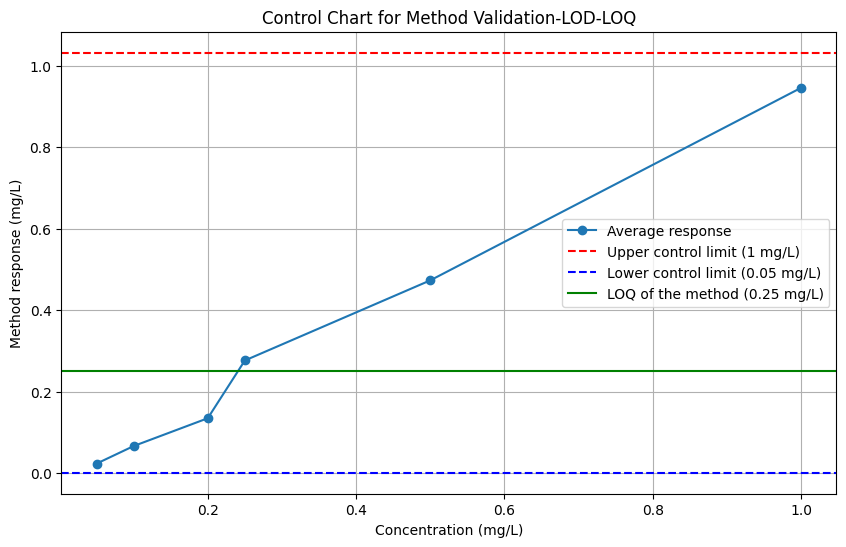

In [38]:
#LDQ-LOQ

import matplotlib.pyplot as plt 
import pandas as pd

# Datos de respuesta proporcionados
datos = {
    '1 ppm': [1.014910714, 0.982857143, 0.974375, 0.975982143, 0.965089286, 0.915625, 
              0.921160714, 0.920178571, 0.916339286, 0.872232143],
    '0.5 ppm': [0.500089286, 0.489821429, 0.480982143, 0.470267857, 0.466875, 0.46125, 
                0.465089286, 0.464375, 0.475803571, 0.459464286],
    '0.25 ppm': [0.271607143, 0.285357143, 0.283392857, 0.274910714, 0.274642857, 0.282232143, 
                 0.273125, 0.275625, 0.275089286, 0.272321429],
    '0.2 ppm': [0.16, 0.142, 0.137, 0.135, 0.13, 0.127, 0.13, 0.129, 0.129, 0.132],
    '0.1 ppm': [0.09, 0.07, 0.069, 0.064, 0.059, 0.066, 0.062, 0.061, 0.064, 0.063],
    '0.05 ppm': [0.053, 0.03, 0.026, 0.02, 0.018, 0.019, 0.018, 0.019, 0.017, 0.017]
}

# Convertimos a DataFrame y calculamos estadísticas
df_concentraciones = pd.DataFrame(datos)
df_stats = df_concentraciones.agg(['mean', 'std']).transpose()
df_stats['concentration'] = [float(conc.replace(' ppm', '')) for conc in df_stats.index]

# Corregimos aquí el nombre de la columna a 'std' que es el nombre correcto
df_stats['LSC'] = df_stats['mean'] + 2 * df_stats['std']  # Límite Superior de Control (Upper Control Limit, UCL)
df_stats['LIC'] = df_stats['mean'] - 2 * df_stats['std']  # Límite Inferior de Control (Lower Control Limit, LCL)

# Inicializamos la figura de Matplotlib
plt.figure(figsize=(10, 6))

# Graficamos el promedio de las respuestas para cada concentración
plt.plot(df_stats['concentration'], df_stats['mean'], 'o-', label='Average response')

# Graficamos los límites de control superior e inferior para cada punto de concentración
for conc in df_stats.index:
    plt.plot(df_stats.loc[conc, 'concentration'], df_stats.loc[conc, 'LSC'], 'r--')
    plt.plot(df_stats.loc[conc, 'concentration'], df_stats.loc[conc, 'LIC'], 'b--')

# Añadimos líneas horizontales para los límites de control general
plt.axhline(y=df_stats['LSC'].max(), color='red', linestyle='--', label='Upper control limit (1 mg/L)')
plt.axhline(y=df_stats['LIC'].min(), color='blue', linestyle='--', label='Lower control limit (0.05 mg/L)')

# Añadimos línea horizontal para el LOQ del método basado en el % de recuperación
loq_metodo = '0.25 mg/L'  # Esto se determinó previamente en la conversación
loq_metodo_value = float(loq_metodo.replace(' mg/L', ''))
plt.axhline(y=loq_metodo_value, color='green', linestyle='-', label=f'LOQ of the method ({loq_metodo_value} mg/L)')

# Añadimos etiquetas y título al gráfico
plt.xlabel('Concentration (mg/L)')
plt.ylabel('Method response (mg/L)')
plt.title('Control Chart for Method Validation-LOD-LOQ')
plt.legend()

# Añadimos la cuadrícula al gráfico
plt.grid(True)

# Mostramos el gráfico
plt.savefig("../Result/Methods_validation/Figuras/PNG/figura1.png", dpi=300, bbox_inches='tight')  # Movido antes de show()
plt.savefig("../Result/Methods_validation/Figuras/PDF/figura1.pdf", dpi=300, bbox_inches='tight')  # Movido antes de show()
plt.show()



## Recovery Control Chart for Chlorogenic Acid

This section evaluates the accuracy of the method through recovery tests using spiked concentrations.

- **Data**: Recovery percentages at two concentration levels (0.4 and 3.6 mg/g).
- **Acceptable range**: 90–110% as recommended by regulatory guidelines.
- **Visualization**:  
  A plot shows individual recovery percentages, along with upper and lower reference boundaries, to visually assess compliance with the accepted range.

This form of analysis ensures that the method can accurately measure the analyte, even in the presence of potential matrix effects.

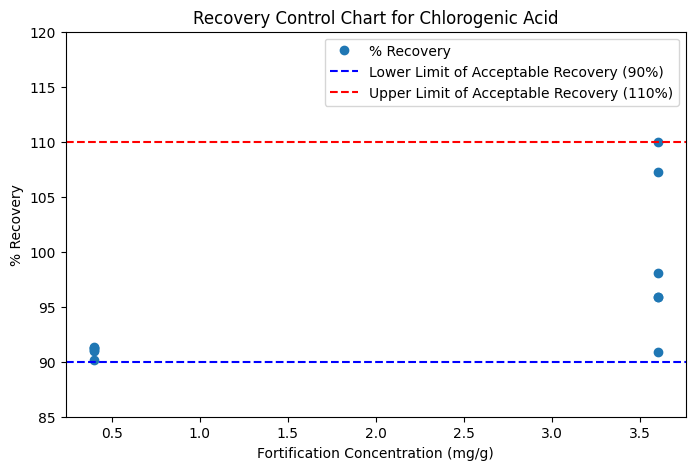

In [35]:
# Reintentamos la creación de la carta de control considerando el rango de recuperación de 90 a 100%

import matplotlib.pyplot as plt
import pandas as pd

# Datos de recuperación proporcionados
concentraciones_fortificacion = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6]  # mg/g de Ácido Clorogénico
porcentajes_recuperacion = [90.95, 91.27, 91.10, 90.20, 91.27, 91.33, 90.88, 95.87, 110, 95.87, 98.06, 107.25]  # % de recuperación

# Crear la carta de control
plt.figure(figsize=(8, 5))

# Graficar los porcentajes de recuperación para cada concentración de fortificación
plt.plot(concentraciones_fortificacion, porcentajes_recuperacion, 'o', label='% Recovery')

# Añadir línea horizontal para el porcentaje de recuperación esperado
# plt.axhline(y=90.95, color='green', linestyle='--', label='Recuperación Esperada (90.95%)')

# Añadir líneas horizontales para el rango de recuperación aceptable (90% a 100%)
plt.axhline(y=90, color='blue', linestyle='--', label='Lower Limit of Acceptable Recovery (90%)')
plt.axhline(y=110, color='red', linestyle='--', label='Upper Limit of Acceptable Recovery (110%)')

# Añadir etiquetas y título
plt.title('Recovery Control Chart for Chlorogenic Acid')
plt.xlabel('Fortification Concentration (mg/g)')
plt.ylabel('% Recovery')
plt.legend()
plt.ylim(85, 120)  # Ajustar el límite del eje Y para mejor visualización

# Mostramos el gráfico
plt.savefig("../Result/Methods_validation/Figuras/PNG/figura2.png", dpi=300, bbox_inches='tight')  # Movido antes de show()
plt.savefig("../Result/Methods_validation/Figuras/PDF/figura2.pdf", dpi=300, bbox_inches='tight')  # Movido antes de show()
plt.show()


## Intra- and Inter-day Precision Analysis

This section assesses the repeatability and intermediate precision of the method by analyzing measurement variability across days and concentrations.

- **Repeatability (Intra-day)**: Variance among replicate measurements on the same day.
- **Intermediate Precision (Inter-day)**: Variance across multiple days at each concentration (high, medium, low).

- **Statistical outputs**: Mean, standard deviation, and coefficient of variation (%CV) for each condition.
- **Visualization**:  
  Bar charts display average values with error bars representing the %CV. Each bar is annotated with the exact variability, enhancing interpretability.

Precision analysis is fundamental to ensuring reproducibility and consistency in quantitative methods.


=== Repetibilidad (Intra-day Precision) ===
          Day  Amount   mean   std  %CV_repeatability
0  2023-08-16    High  24.52  0.44               1.81
1  2023-08-16     Low   0.85  0.05               5.94
2  2023-08-16  medium   3.53  0.15               4.32
3  2023-08-17    High  22.37  1.26               5.65
4  2023-08-17     Low   0.68  0.14              21.46
5  2023-08-17  medium   3.48  0.28               8.18
6  2023-08-18    High  21.12  0.00               0.01
7  2023-08-18     Low   0.76  0.30              40.02
8  2023-08-18  medium   3.75  0.18               4.79

=== Precisión Intermedia (Inter-day Precision) ===
   Amount   mean   std  %CV_intermediate
0    High  22.67  1.72              7.59
1     Low   0.76  0.09             11.30
2  medium   3.59  0.14              3.94


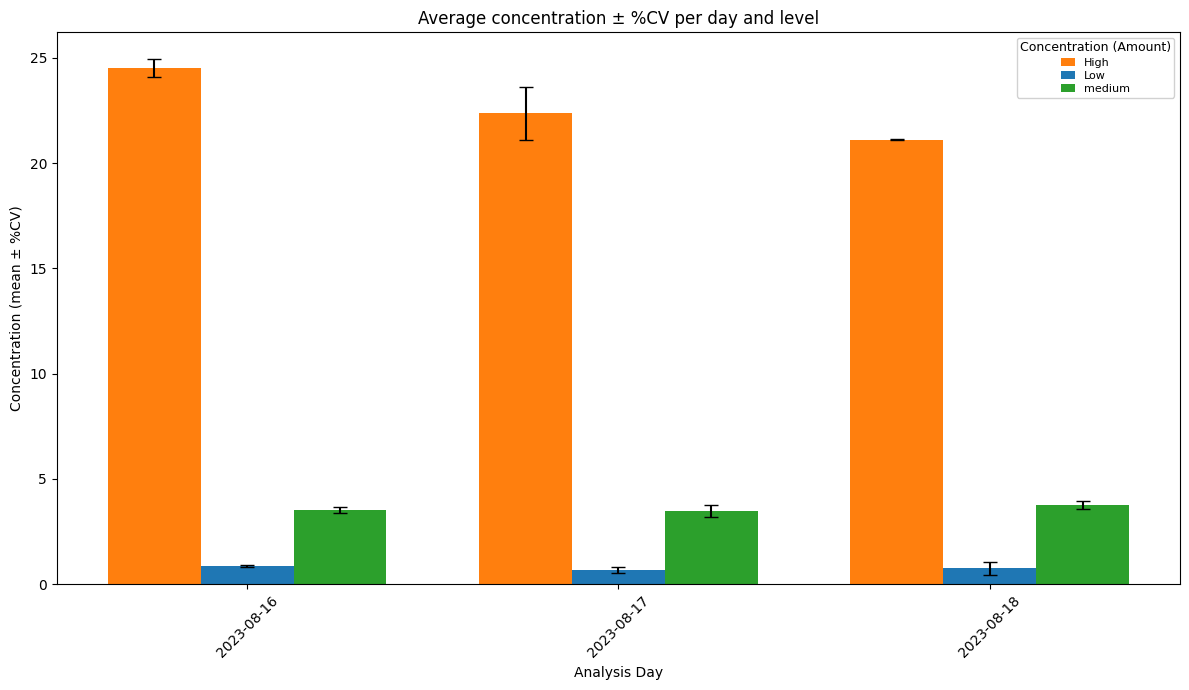

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../Data/Data_validation_metodth/Presicion.xlsx'
data = pd.read_excel(file_path)
data['Day'] = pd.to_datetime(data['Day'], dayfirst=True).dt.date

# ========== REPEATABILITY (INTRA-DAY) ==========
repetibilidad = data.groupby(['Day', 'Amount'])['Concentration'].agg(['mean', 'std']).reset_index()
repetibilidad['%CV_repeatability'] = (repetibilidad['std'] / repetibilidad['mean']) * 100
repetibilidad = repetibilidad.round(2)

print("\n=== Repetibilidad (Intra-day Precision) ===")
print(repetibilidad)

# ========== INTERMEDIATE PRECISION (INTER-DAY) ==========
# First calculate the daily average by Amount
media_diaria = data.groupby(['Day', 'Amount'])['Concentration'].mean().reset_index()
precision_intermedia = media_diaria.groupby('Amount')['Concentration'].agg(['mean', 'std']).reset_index()
precision_intermedia['%CV_intermediate'] = (precision_intermedia['std'] / precision_intermedia['mean']) * 100
precision_intermedia = precision_intermedia.round(2)

print("\n=== Precisión Intermedia (Inter-day Precision) ===")
print(precision_intermedia)

# ========== PIVOT TABLES FOR GRAPHING ==========
media_df = repetibilidad.pivot(index='Day', columns='Amount', values='mean')
cv_df = repetibilidad.pivot(index='Day', columns='Amount', values='%CV_repeatability')
error_abs = (cv_df / 100) * media_df

# ========== GRAPH ==========
colores = ['#ff7f0e', '#1f77b4', '#2ca02c']

fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(media_df.index))     
tipos = media_df.columns               
ancho = 0.25                           

for i, tipo in enumerate(tipos):
    medias = media_df[tipo]
    errores = error_abs[tipo]
    cvs = cv_df[tipo]

    bars = ax.bar(x + i * ancho, medias, yerr=errores, capsize=5, width=ancho,
                  label=f'{tipo}', color=colores[i])

    # for j, (bar, cv) in enumerate(zip(bars, cvs)):
    #    altura = bar.get_height()
    #    centro_x = bar.get_x() + bar.get_width() / 2
    #    margen = 0.01 * altura
    #    ax.text(centro_x, altura + errores.iloc[j] + margen, f"{cv:.1f}%", 
    #            ha='center', va='bottom', fontsize=8)

# ========== FORMATS ==========
ax.set_xticks(x + ancho)
ax.set_xticklabels([str(d) for d in media_df.index], rotation=45)
ax.set_title('Average concentration ± %CV per day and level')
ax.set_ylabel('Concentration (mean ± %CV)')
ax.set_xlabel('Analysis Day')

# ========== REDUCED INTERNAL LEGEND ==========
ax.legend(
    title='Concentration (Amount)',
    title_fontsize=9,
    prop={'size': 8},
    loc='upper right',
    handlelength=1.3,
    labelspacing=0.3,
    borderpad=0.3,
    frameon=True,
    framealpha=0.9
)

plt.tight_layout()
plt.savefig('../Result/Methods_validation/Figuras/PDF/barras_%CV_repetibilidad.pdf', dpi=300)
plt.savefig('../Result/Methods_validation/Figuras/PNG/barras_%CV_repetibilidad.PNG', dpi=300)
plt.show()


## Comparative Measurement Analysis Under Light and Shade Conditions

This section presents a visual comparison of 18 measurements obtained under two environmental conditions: shade and direct light.

- **Data**: Two groups of 9 measurements each are recorded for “Shade” and “Light” conditions.
- **Visualization**:  
  - A line graph connects the sequential measurements, with each point labeled by its condition and value.
  - A horizontal reference line at y = 300 facilitates visual interpretation of threshold exceedance.
- **Purpose**:  
  This graphical representation supports rapid visual comparison between the two conditions, enabling the identification of trends or shifts due to light exposure. The direct labeling of data points enhances clarity and communication of experimental differences.

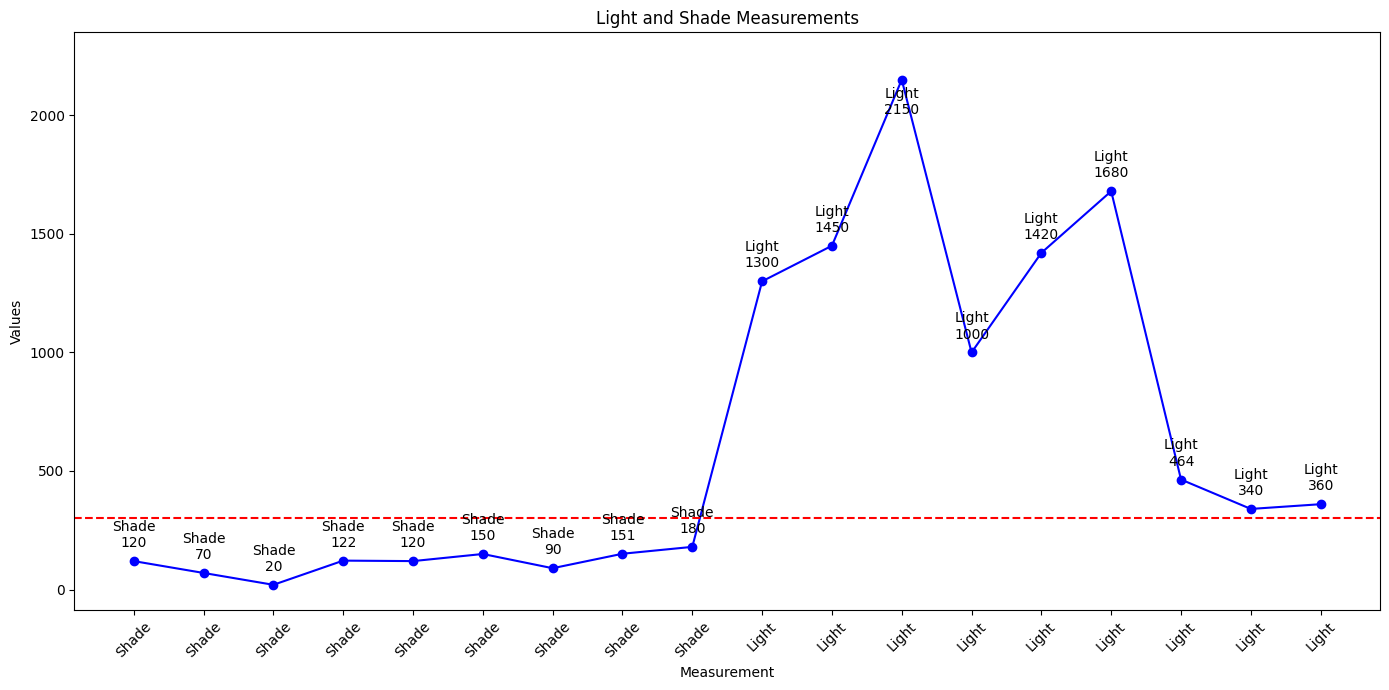

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import os  

#Data
condiciones_nuevos = ['Shade'] * 9 + ['Light'] * 9
valores_nuevos = [120, 70, 20, 122, 120, 150, 90, 151, 180, 
                  1300, 1450, 2150, 1000, 1420, 1680, 464, 340, 360]

# Create DataFrame
df_nuevos = pd.DataFrame({
    'Conditions': condiciones_nuevos,
    'Valores': valores_nuevos
})
df_nuevos['Index'] = range(len(df_nuevos))

# Create figure
plt.figure(figsize=(14, 7))
plt.plot(df_nuevos['Index'], df_nuevos['Valores'], marker='o', linestyle='-', color='blue')

# Add labels to each point with adaptive scrolling
for i, (val, cond) in enumerate(zip(df_nuevos['Valores'], df_nuevos['Conditions'])):
    offset = 10 if val < 2000 else -25  # Alejar etiqueta del borde si valor es muy alto
    plt.annotate(f'{cond}\n{val}', (i, val), textcoords="offset points", xytext=(0, offset), ha='center')

# Horizontal line at y=300
plt.axhline(y=300, color='red', linestyle='--')

# Titles and axes
plt.title('Light and Shade Measurements')
plt.xlabel('Measurement')
plt.ylabel('Values')
plt.xticks(df_nuevos['Index'], df_nuevos['Conditions'], rotation=45)

# Adjusting the y-axis to add top margin
plt.ylim(top=max(df_nuevos['Valores']) + 200)

# Adjust element distribution
plt.tight_layout()


png_path = "../Result/Methods_validation/Figuras/PNG/figura3.png"
pdf_path = "../Result/Methods_validation/Figuras/PDF/figura3.pdf"

# Guardar imágenes
plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')
plt.show()
